### Access libraries that will be used

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [77]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'P:\Users\amayer\Documents\GitHub\Orlando-Magic-GameScore-Stats-and-Graphics-2020_21-Season\Data\ConvertStatHead.csv')
magic.head()

,FirstName,LastName,Age,Pos,Tm,H/A,Opp,Column2,Date,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,BPM
0,Nikola,Vučević,30-066,C,ORL,A,OKC,W,12/29/2020,1,...,7,10,5,1,0,1,0,28,27.9,13.7
1,Nikola,Vučević,30-070,C,ORL,H,OKC,L,1/2/2021,1,...,11,13,2,0,0,1,1,30,25.2,13.0
2,Nikola,Vučević,30-072,C,ORL,H,CLE,W,1/4/2021,1,...,6,8,2,2,3,0,0,23,24.1,18.8
3,Evan,Fournier,28-055,G-F,ORL,H,MIA,W,12/23/2020,1,...,0,0,4,3,0,2,2,25,22.1,12.4
4,Aaron,Gordon,25-110,F,ORL,H,CLE,W,1/4/2021,1,...,5,11,1,1,0,2,1,24,20.7,15.8


In [78]:
magic.tail()

,FirstName,LastName,Age,Pos,Tm,H/A,Opp,Column2,Date,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,BPM
81,Michael,Carter-Williams,29-084,G,ORL,H,OKC,L,1/2/2021,1,...,5,9,1,0,0,1,5,4,-0.9,-16.3
82,Karim,Mané,20-229,G,ORL,H,PHI,L,12/31/2020,0,...,4,4,0,0,0,0,1,0,-1.3,-13.7
83,Dwayne,Bacon,25-115,G,ORL,H,MIA,W,12/23/2020,1,...,3,3,3,0,0,0,2,0,-1.3,-12.7
84,Mohamed,Bamba,22-239,C,ORL,H,CLE,W,1/6/2021,0,...,1,1,0,0,0,0,2,0,-1.9,NaN
85,Michael,Carter-Williams,29-086,G,ORL,H,CLE,W,1/4/2021,1,...,0,1,3,0,1,2,2,0,-2.1,-11.8


### Display data using histogram, swarmplot, and boxplot

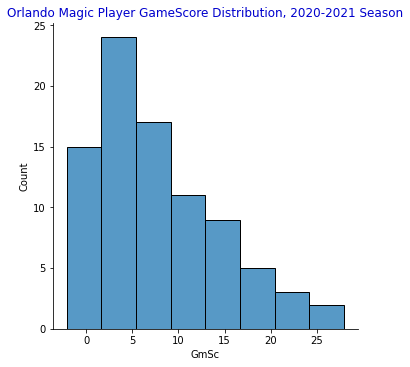

In [79]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

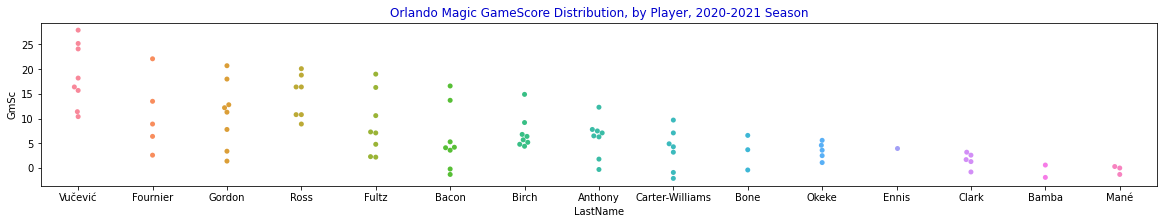

In [80]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

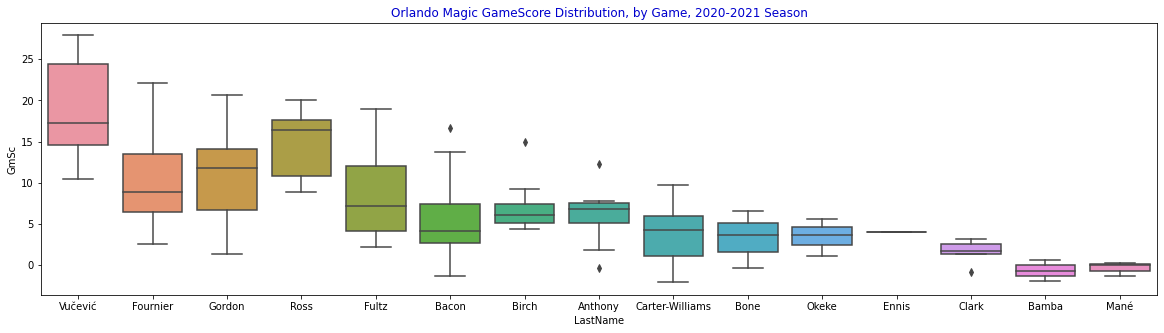

In [81]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


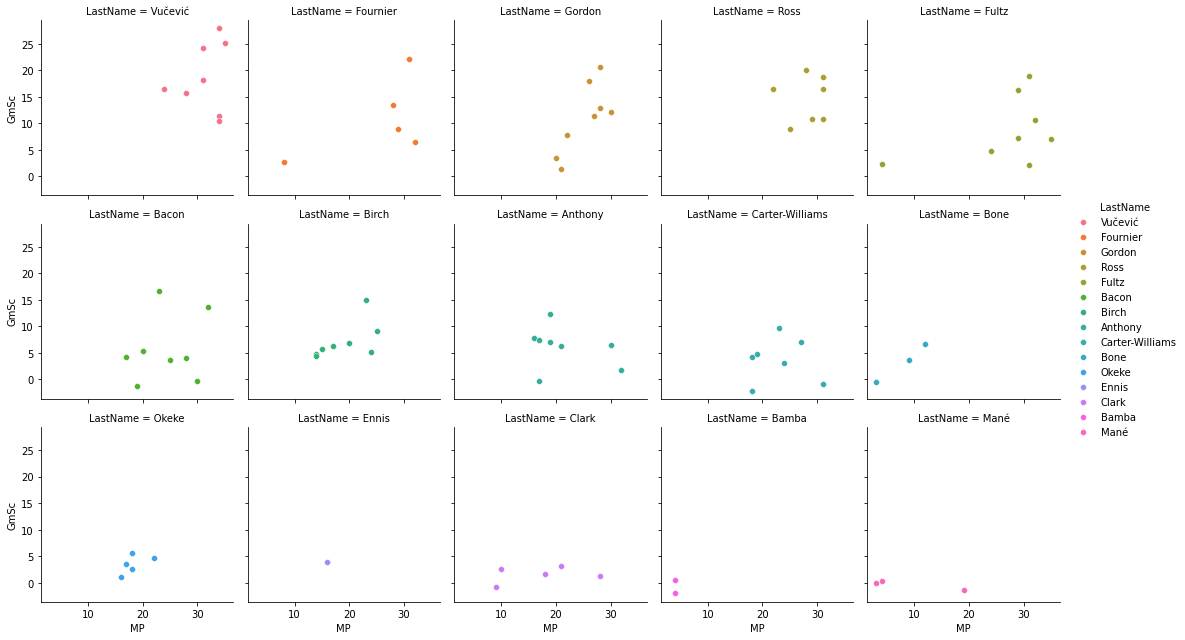

In [82]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

K:\Users\adria\Downloads\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


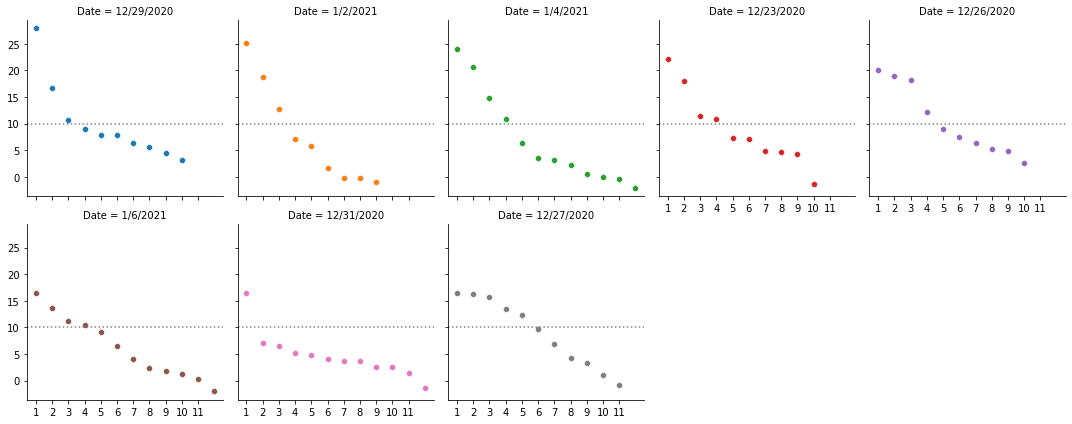

In [85]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [84]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                        
                count       mean       std   min     25%    50%     75%   max
LastName                                                                     
Anthony           8.0   6.125000  3.853292  -0.3   5.175   6.80   7.575  12.3
Bacon             8.0   5.750000  6.278990  -1.3   2.650   4.15   7.400  16.6
Bamba             2.0  -0.650000  1.767767  -1.9  -1.275  -0.65  -0.025   0.6
Birch             8.0   7.175000  3.462761   4.4   5.100   6.05   7.400  14.9
Bone              3.0   3.300000  3.517101  -0.4   1.650   3.70   5.150   6.6
Carter-Williams   7.0   3.742857  4.171274  -2.1   1.150   4.30   6.000   9.7
Clark             5.0   1.600000  1.534601  -0.8   1.300   1.70   2.600   3.2
Ennis             1.0   4.000000       NaN   4.0   4.000   4.00   4.000   4.0
Fournier          5.0  10.700000  7.502333   2.6   6.400   8.90  13.500  22.1
Fultz             8.0   8.700000  6.215189   2.2   4.175   7.20  12.025  19.0
Gordon            8.0  10.950000  6.633250   1.4   6.700  11.75  14.100  20.7
Mané              3.0  -0.333333  0.850490  -1.3  -0.650   0.00   0.150   0.3
Okeke             5.0   3.480000  1.759830   1.1   2.500   3.60   4.600   5.6
Ross              7.0  14.600000  4.392038   8.9  10.800  16.40  17.600  20.1
Vučević           8.0  18.662500  6.467046  10.4  14.625  17.30  24.375  27.9